# Lecture 16: PID Controllers

## Recap
In [Lecture 15](Lecture15.ipynb), we introduced transfer functions and the idea of steady-state error. We saw that integral action improves tracking. 

**Earlier**

Linear system:
$$
\dot{x} = A x + B u, \quad y = Cx + Du
$$

Input:
$$
u(t) = e^{st}, \quad (s \in \mathbb{C},\; s \neq \lambda(A))
$$

Steady-state output:
$$
y_{ss}(t) = \big[D + C(sI - A)^{-1}B\big] u(t)
$$

$\big[D + C(sI - A)^{-1}B\big]$ is the **transfer function**.


**Last Lecture**

For an ODE with output $y$ and input:

$$
a_n \frac{d^n y}{dt^n} + a_{n-1} \frac{d^{n-1} y}{dt^{n-1}} + \cdots + a_0 y 
= b_m \frac{d^m u}{dt^m} + \cdots + b_0 u
$$

the transfer function is:

$$
G(s) = \frac{b_m s^m + \cdots + b_0}{a_n s^n + \cdots + a_0}
$$

- Poles of $G(s)$: roots of denominator $a(s) = 0$  
- Zeros of $G(s)$: roots of numerator $b(s) = 0$  
- Poles of $G(s)$ = eigenvalues of $A$

### 💡 Try this prompt
*"Explain the difference between poles and zeros of a transfer function in simple terms, and why poles are related to system stability."*


In [14]:
# Message code

import ipywidgets as widgets
from IPython.display import display, clear_output
%pip install requests
import requests

# --- CONFIGURATION (set up once) ---
FORM_URL = "https://docs.google.com/forms/d/e/XXXXXXXXXXXXXXXXX/formResponse"
ENTRY_FIELD = "entry.1234567890"  # Replace with your form's entry field name

# --- UI Elements ---
title = widgets.HTML("<h3>💬 Send a Message to the Instructor</h3>")
desc = widgets.HTML("<p>Type your question, comment, or feedback below and click <b>Send</b>.</p>")

text_box = widgets.Textarea(
    placeholder='Type your message here...',
    layout=widgets.Layout(width='100%', height='100px'),
    style={'description_width': '0px'}
)

button = widgets.Button(description="📨 Send", button_style='info')
status = widgets.Output()

def on_click(b):
    with status:
        clear_output()
        message = text_box.value.strip()
        if not message:
            print("⚠️ Please type a message before sending.")
            return
        
        # Send to Google Form
        data = {ENTRY_FIELD: message}
        try:
            r = requests.post(FORM_URL, data=data)
            if r.status_code == 200:
                print("✅ Your message was sent successfully!")
                text_box.value = ""
            else:
                print(f"⚠️ There was a problem sending (status code {r.status_code}).")
        except Exception as e:
            print("❌ Could not send message.")

button.on_click(on_click)

# Display nicely without showing code
display(widgets.VBox([title, desc, text_box, button, status]))


Process pip requirements ...

Requirement requests already satisfied.


### Today
We extend the controller structure to **Proportional–Integral–Derivative (PID)** controllers.
Relevant book section: *Section 10.1 (Basic Control Fractions).*

## Proportional–Integral–Derivative (PID) Control

Recall the control structure from the previous lecture where we used **integral action**.

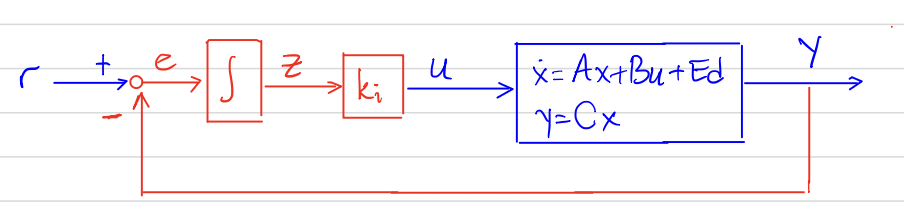

Now, we will work with the **transfer function representation** of the system and controller.  
Additionally, we will extend the controller structure to include proportional and derivative terms.

---

### PID Controller Structure


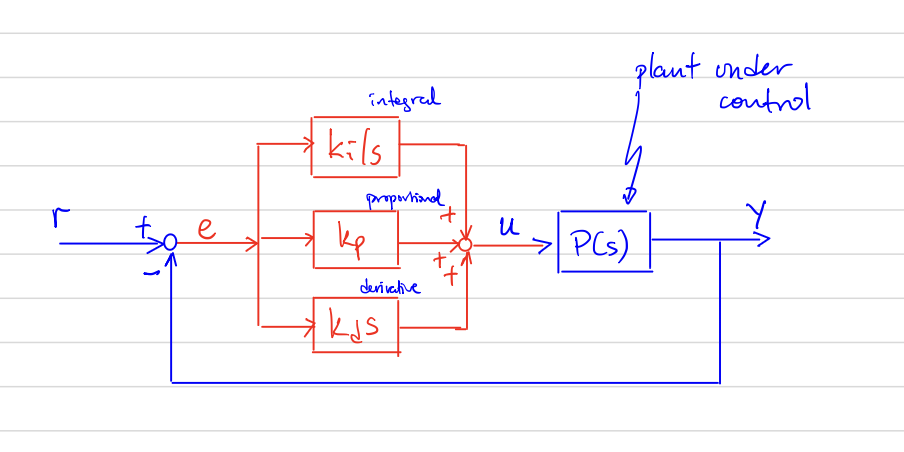

Error signal:
$$
e(t) = r(t) - y(t)
$$

Controller action:
$$
u(t) = k_p e(t) + k_i \int e(\tau)\, d\tau + k_d \frac{de(t)}{dt}
$$

Transfer function form:
$$
C(s) = k_p + \frac{k_i}{s} + k_d s
$$

Here:
- $k_p$: proportional gain  
- $k_i$: integral gain  
- $k_d$: derivative gain  

and the **plant** is represented by:
$$
P(s)
$$


## Another Interpretation of P, I, and D Terms

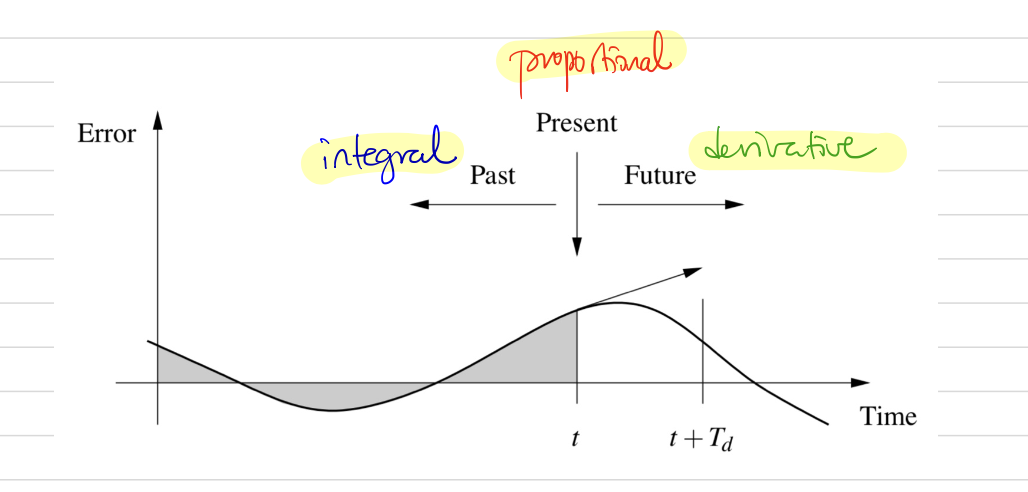

- **Proportional**: depends on the instantaneous error value
$$
u_P(t) = k_p e(t)
$$

- **Integral**: based on the integral of the error up to time $t$
$$
u_I(t) = k_i \int_0^t e(\tau)\, d\tau
$$

- **Derivative**: provides an estimate of the growth (rate of change) of the error
$$
u_D(t) = k_d \frac{de(t)}{dt}
$$

---

📌 **Interpretation**:
- The **integral** term captures the **past** error.  
- The **proportional** term acts on the **present** error.  
- The **derivative** term predicts the **future** error.  


## Closed-Loop Transfer Function with a PID Controller

![controllerblock.png](controllerblock.png)

Let the controller transfer function be:
$$
C(s) = k_p + \frac{k_i}{s} + k_d s
$$

and the plant transfer function be:
$$
P(s).
$$

---

### Closed-Loop Transfer Function

From reference $r$ to output $y$:
$$
G_{ry}(s) = \frac{P(s) C(s)}{1 + P(s) C(s)}.
$$

---

📌 **Recall**:  
For a stable system modeled by transfer function $H(s)$,  
the steady-state gain under a step input is:
$$
H(0).
$$


## Proportional Control (P Only)

Consider pure proportional feedback (i.e., $k_i = 0$ and $k_d = 0$).

---

### Steady-State Output

For a unit step reference input:

$$
y_{ss} = G_{ry}(0) \cdot 1 = \frac{C(0) P(0)}{1 + C(0) P(0)}
$$

With $C(s) = k_p \;\;\Rightarrow\;\; C(0) = k_p$:

$$
y_{ss} = \frac{k_p P(0)}{1 + k_p P(0)}
$$

---

📌 **Observation**:  
By adjusting $k_p$, one can make $y_{ss}$ approach 1, but steady-state error cannot be fully eliminated.


## Example with code: Proportional Control Only

Consider the plant:
$$
P(s) = \frac{1}{(s+1)^3}.
$$

We apply **pure proportional control** with $C(s) = k_p$.

---

### Step Responses

- For different values of $k_p$ (e.g., $k_p = 1, 2, 5$),  
  we compare the closed-loop **step response** $y(t)$ and the corresponding **control input** $u(t)$.

---

📌 **Observations**:
- Increasing $k_p$:
  - reduces the steady-state error
  - but introduces larger oscillations and overshoot

This demonstrates the trade-off of proportional control:  
you can reduce error, but stability margins worsen as $k_p$ increases.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
%pip install control
from control.matlab import *
import ipywidgets as widgets
from ipywidgets import interact

# Plant: P(s) = 1 / (s+1)^3
num = [1]
den = [1, 3, 3, 1]  # (s+1)^3 expansion
P = tf(num, den)

def proportional_demo(kp=1.0):
    # Controller C(s) = kp
    C = tf([kp], [1])
    sys_cl = feedback(C*P, 1)

    # Simulate step response
    t = np.linspace(0, 30, 500)
    y, t = step(sys_cl, t)

    # Error and control input
    e = 1 - y  # since reference r = 1
    u = kp * e

    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

    # Step response y
    ax1.plot(t, y, label=f"$k_p={kp:.2f}$")
    ax1.axhline(1, color='r', linestyle='--')
    ax1.set_title("Step Response y(t)")
    ax1.set_xlabel("t")
    ax1.set_ylabel("y")
    ax1.set_ylim([-0.2, 2.0])
    ax1.grid(True)
    ax1.legend()

    # Control input u
    ax2.plot(t, u, label=f"$k_p={kp:.2f}$")
    ax2.axhline(0, color='r', linestyle='--')
    ax2.set_title("Control Input u(t)")
    ax2.set_xlabel("t")
    ax2.set_ylabel("u")
    ax2.set_ylim([-0.2, 2.0])
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Slider for kp
interact(proportional_demo, kp=(0.1, 10.0, 0.1));


Process pip requirements ...

Requirement control already satisfied.


interactive(children=(FloatSlider(value=1.0, description='kp', max=10.0, min=0.1), Output()), _dom_classes=('w…

### 💡 Try this prompt
*"Why does proportional control reduce steady-state error but cannot eliminate it? Give an everyday analogy."*

*"I just increased $k_p$ in a proportional controller. The output oscillates more. Why does this happen?"*


## Introducing Integral Feedback

Now consider a controller with proportional + integral action:
$$
C(s) = k_p + \frac{k_i}{s}.
$$

The closed-loop transfer function is:
$$
G_{ry}(s) = \frac{\left(k_p + \tfrac{k_i}{s}\right) P(s)}{1 + P(s)\left(k_p + \tfrac{k_i}{s}\right)}.
$$

Multiply numerator and denominator by $s$:
$$
G_{ry}(s) = \frac{(k_p s + k_i) P(s)}{s + P(s)(k_p s + k_i)}.
$$

---

### Steady-State Behavior

For a unit step input, the steady-state output is:
$$
G_{ry}(0) = \frac{k_i P(0)}{k_i P(0)} = 1.
$$

---

📌 **Key Observations**:
- Perfect reference tracking  
- Independent of the plant parameters  

---

📖 **Recall**:  
This is an important result — but it is not new.  
We already saw that integral action eliminates steady-state error.  
Here we derived it in a different way.

### 💡 Try this prompt
*"How does adding integral action guarantee zero steady-state error? Explain using both math and intuition."*

## Example: Proportional + Integral Control (PI)

Same plant as before:
$$
P(s) = \frac{1}{(s+1)^3},
$$

with proportional + integral control:
$$
C(s) = k_p + \frac{k_i}{s}, \quad k_p = 2.
$$

---

### Observations

- Zero $k_i \;\;\Rightarrow$ non-zero steady-state error  
- Nonzero $k_i \;\;\Rightarrow$ zero steady-state error  
- As $k_i$ increases:
  - the approach to steady-state output is faster
  - but the system becomes more oscillatory


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *
import ipywidgets as widgets
from ipywidgets import interact

# Plant: P(s) = 1 / (s+1)^3
num = [1]
den = [1, 3, 3, 1]
P = tf(num, den)

def pi_demo(ki=0.0):
    kp = 2.0  # fixed
    
    # PI controller: C(s) = kp + ki/s
    C = tf([kp, ki], [1, 0])
    
    # Closed-loop system
    sys_cl = feedback(C*P, 1)
    
    # Step response
    t = np.linspace(0, 50, 800)
    y, t = step(sys_cl, T=t)
    
    # Error and control input
    e = 1 - y  # since r = 1
    # Control input u = kp*e + ki ∫e dt (simulate integral with cumulative sum)
    u = kp*e + ki*np.cumsum(e)*(t[1]-t[0])
    
    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    
    # Step response y(t)
    ax1.plot(t, y, label=f"$k_i={ki:.2f}$")
    ax1.axhline(1, color='r', linestyle='--')
    ax1.set_ylim([0, 1.5])
    ax1.set_title("Step Response y(t)")
    ax1.set_xlabel("t")
    ax1.set_ylabel("y")
    ax1.grid(True)
    ax1.legend()
    
    # Control input u(t)
    ax2.plot(t, u, label=f"$k_i={ki:.2f}$")
    ax2.axhline(0, color='r', linestyle='--')
    ax2.set_ylim([-1, 3])
    ax2.set_title("Control Input u(t)")
    ax2.set_xlabel("t")
    ax2.set_ylabel("u")
    ax2.grid(True)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

# Slider for ki
interact(pi_demo, ki=(0.0, 2.0, 0.1));


interactive(children=(FloatSlider(value=0.0, description='ki', max=2.0), Output()), _dom_classes=('widget-inte…

### 💡 Try this prompt
*"What trade-offs occur when I increase $k_i$ in a PI controller? Use both engineering and real-life examples."*

## Disturbance Attenuation with Integral Action

Another useful property of integral action:  
**perfect disturbance rejection at steady state.**

---
![Screenshot 2025-09-09 at 5.59.06 PM.png](attachment:95add3f8-aa05-46af-9e96-8a38f287472f.png)

### Setup

Assume:
- Reference $r = 0$
- Disturbance $d$ is a unit step
- Controller: integral only
$$
C(s) = \frac{k_i}{s}.
$$

---

### Disturbance-to-Output Transfer Function

The closed-loop transfer function from disturbance $d$ to output $y$ is:
$$
G_{dy}(s) = \frac{P(s)}{1 + P(s)C(s)}.
$$

Substituting $C(s) = \tfrac{k_i}{s}$:
$$
G_{dy}(s) = \frac{s P(s)}{s + P(s) k_i}.
$$

---

### Steady-State Behavior

Evaluate at $s \to 0$:
$$
G_{dy}(0) = \frac{0}{P(0) k_i} = 0.
$$

---

📌 **Key Result**:  
Integral action ensures **perfect disturbance rejection** for constant disturbances at steady state.

### 💡 Try this prompt
*"Why does integral control reject constant disturbances at steady state? What kind of disturbances can it not reject?"*


## Adding the Derivative Term

Now include derivative action in the controller:
$$
C(s) = k_p + \frac{k_i}{s} + k_d s.
$$

We check the closed-loop response under a **unit step reference input**.

---

### Fixed Parameters
- $k_p = 2.5$
- $k_i = 1.5$

We vary $k_d$.

---

📌 **Observation**:
- As $k_d$ increases, the closed-loop system becomes **more damped**
- Overshoot decreases
- Oscillations are reduced


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *
import ipywidgets as widgets
from ipywidgets import interact

# Plant: P(s) = 1 / (s+1)^3
num = [1]
den = [1, 3, 3, 1]
P = tf(num, den)

def pid_demo(kd=0.0):
    kp = 2.5
    ki = 1.5
    
    # PID controller: C(s) = kp + ki/s + kd*s
    C = tf([kd, kp, ki], [1, 0])
    
    # Closed-loop system
    sys_cl = feedback(C*P, 1)
    
    # Step response
    t = np.linspace(0, 20, 800)
    y, t = step(sys_cl, T=t)
    
    # Plot
    plt.figure(figsize=(7,5))
    plt.plot(t, y, label=f"$k_d={kd:.2f}$")
    plt.axhline(1, color='r', linestyle='--')
    plt.ylim([0, 1.8])
    plt.title("Step Response y(t) with PID Control")
    plt.xlabel("t")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()
    plt.show()

# Slider for kd
interact(pid_demo, kd=(0.0, 5.0, 0.1));


interactive(children=(FloatSlider(value=0.0, description='kd', max=5.0), Output()), _dom_classes=('widget-inte…

### 💡 Try this prompt
*"What does derivative control do to a system's response? Explain in terms of damping and overshoot."*

*"When I increase $k_d$, my system becomes less oscillatory but more sensitive to noise. Why is derivative control noise-sensitive?"*

## Example: Effect of the Derivative Term

Let the reference be $r = 0$.  
We analyze the **free response** of the closed-loop system.

---

### Open-Loop System
$$
\ddot{y} + \alpha_1 \dot{y} + \alpha_2 y = u
$$

---

### Derivative Control
$$
u = k_d \dot{e} = k_d ( \dot{r} - \dot{y} ) = -k_d \dot{y}
$$

---

### Closed-Loop System
Substituting the control input:
$$
\ddot{y} + (\alpha_1 + k_d)\dot{y} + \alpha_2 y = 0
$$

---

### Observations
- $\alpha_2$ is unchanged $\;\;\Rightarrow\;\;$ natural frequency $\omega_n$ is unchanged  
- Increasing $k_d$ increases the damping term $(\alpha_1 + k_d)$  
- Choose $k_d$ such that:
$$
\alpha_1 + k_d = 2 \zeta \omega_n
$$
to set the desired damping ratio $\zeta$

## Exercise: Matching Controllers to Responses

**Problem (from Midterm 2, Spring 2019)**

Let $P(s)$ be the transfer function for a stable, second-order linear system, and consider the feedback interconnection below:

![Screenshot 2025-09-09 at 5.59.40 PM.png](attachment:6a2b6f7a-ddae-43df-941f-92d48410c378.png)

with unity feedback and possible disturbance $d$.

---

### Candidate Controllers

- $C_1(s) = 1$  
- $C_2(s) = 2$  
- $C_3(s) = 1 + \tfrac{1}{s}$  
- $C_4(s) = 1 + \tfrac{1}{s} + s$

---

### Observed Responses

![Screenshot 2025-09-09 at 5.59.48 PM.png](attachment:112d9b6c-5735-4232-be7e-4ed2d7cb12a0.png)

The figure shows the **unit step responses** $Y_1, Y_2, Y_3, Y_4$ from $r \to y$ for these controllers.

**Task**:
- Match each controller $C_i$ to the corresponding response $Y_j$  
- Briefly explain your reasoning

---

### Hints for Reasoning
- **$C_1$ and $C_2$ (proportional control):**
  - Nonzero steady-state error (output settles below 1)
  - Larger $k_p$ gives smaller steady-state error but possibly more oscillations
- **$C_3$ (PI control):**
  - Eliminates steady-state error (final value = 1)
  - May be more oscillatory
- **$C_4$ (PID control):**
  - Eliminates steady-state error (final value = 1)
  - With derivative action, the system is more damped (less overshoot)

---

📌 **Answer Check**:
- $C_1(s)=1$ → lowest steady-state output (largest error)  
- $C_2(s)=2$ → higher steady-state output, still error remains  
- $C_3(s)=1 + \tfrac{1}{s}$ → converges to 1 with oscillations  
- $C_4(s)=1 + \tfrac{1}{s} + s$ → converges to 1 with damping (least oscillatory among those reaching 1)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from control.matlab import *
import ipywidgets as widgets
from ipywidgets import interact

# Plant: P(s) = 1 / (s+1)^3
num = [1]
den = [1, 3, 3, 1]
P = tf(num, den)

def pid_demo(kp=2.5, ki=1.5, kd=0.0):
    # PID controller: C(s) = kp + ki/s + kd*s
    C = tf([kd, kp, ki], [1, 0])   # numerator [kd, kp, ki], denominator [1, 0] → kd*s^2 + kp*s + ki / s
    
    # Closed-loop system
    sys_cl = feedback(C*P, 1)
    
    # Step response
    t = np.linspace(0, 20, 800)
    y, t = step(sys_cl, T=t)
    
    # Plot
    plt.figure(figsize=(7,5))
    plt.plot(t, y, label=f"$k_p={kp:.2f}, k_i={ki:.2f}, k_d={kd:.2f}$")
    plt.axhline(1, color='r', linestyle='--')
    plt.ylim([0, 2])
    plt.title("Step Response y(t) with PID Control")
    plt.xlabel("t")
    plt.ylabel("y")
    plt.grid(True)
    plt.legend()
    plt.show()

# Sliders for kp, ki, kd
interact(pid_demo,
         kp=(0.0, 5.0, 0.1),
         ki=(0.0, 5.0, 0.1),
         kd=(0.0, 5.0, 0.1));

Matplotlib is building the font cache; this may take a moment.


<class 'ModuleNotFoundError'>: No module named 'control'

## Industry Relevance of PID Control

PID controllers are by far the **most widely used controllers in industry**.  
It is estimated that **more than 90% of control loops in practice** use PID or its variants.  

---

### Why PID is so common
- **Simplicity**: only three parameters ($k_p, k_i, k_d$)  
- **Interpretability**: each term has a clear role  
  - $k_p$: reacts to present error  
  - $k_i$: removes steady-state error  
  - $k_d$: adds damping and anticipates error growth  
- **Versatility**: works across mechanical, electrical, chemical, thermal, and many other systems  
- **Low-cost implementation**: can run on basic microcontrollers, PLCs, or DCS systems  

---

### Common Application Areas
- **Manufacturing & process control**: temperature, pressure, flow, level control  
- **Automotive**: cruise control, engine control, suspension damping  
- **Robotics**: joint position/velocity control, drone attitude control  
- **Power & energy**: grid frequency regulation, inverter control  
- **Everyday devices**: thermostats, washing machines, quadcopters  

---

### Practical Tuning Guidelines

**1. Manual Tuning**
- Increase $k_p$ until oscillations appear → then back off slightly  
- Add $k_i$ to eliminate steady-state error (watch for increased oscillations)  
- Add $k_d$ to reduce overshoot and improve damping  

**2. Ziegler–Nichols Method (classic)**
- Increase $k_p$ until the system reaches the **ultimate gain** $K_u$ (sustained oscillations)  
- Measure the oscillation period $T_u$  
- Use formulas to set PID gains:  
  - $k_p = 0.6 K_u$  
  - $k_i = 2 k_p / T_u$  
  - $k_d = k_p T_u / 8$

**3. Software-Assisted Tuning**
- Many PLCs, DCSs, and controllers offer **auto-tuning algorithms**  
- They apply test signals, estimate dynamics, and adjust gains automatically  

---

### Practical Tips
- Always **start with P-only**, then add I, then D if needed  
- Scale signals properly (avoid actuator saturation)  
- Watch for **noise sensitivity** when using derivative action  
- Consider **PI-only** control in slow/noisy processes (common in process control)  
- PID gains often need re-tuning when system conditions change (e.g., load variation, aging equipment)  

---

📌 **Key Insight**:  
PID is not “optimal” in theory, but it **balances simplicity and performance** so well that it has dominated industrial control for almost a century.

## Applications of PID Control Beyond Classical Process Systems

While PID control is historically tied to process industries (temperature, pressure, flow, level), it has also found wide applications in **other fields** due to its simplicity and robustness.

---

### 1. Robotics and Autonomous Systems
- **Joint position and velocity control** in robotic arms  
- **Quadcopter and drone stabilization**: PID loops regulate pitch, roll, and yaw  
- **Mobile robots**: trajectory following using wheel velocity PID controllers  
- **Humanoid robots**: balance and gait control

---

### 2. Automotive and Transportation
- **Cruise control systems**: PID adjusts throttle to maintain speed  
- **Automatic braking and traction control**  
- **Suspension systems**: active damping with PID improves ride comfort  
- **Railway and aerospace systems**: stability augmentation in flight/locomotion

---

### 3. Power and Energy Systems
- **Grid frequency and voltage regulation**  
- **Inverters and converters** in renewable energy integration  
- **Wind turbine pitch control** for maximizing efficiency  
- **Battery management systems** for electric vehicles and energy storage

---

### 4. Healthcare and Biomedical Engineering
- **Medical infusion pumps**: maintain drug delivery rates  
- **Anesthesia control systems**: regulate drug concentrations in patients  
- **Artificial pancreas**: glucose-insulin regulation using PID loops  
- **Rehabilitation devices and prosthetics**: motion stabilization

---

### 5. Consumer Electronics
- **Temperature regulation** in ovens, refrigerators, and HVAC systems  
- **Camera autofocus** mechanisms  
- **Hard disk drive read/write head positioning**  
- **3D printers**: extruder temperature and motor control

---

### 6. Economics and Finance (nontraditional applications)
- **Inventory control models**: PID-like adjustments to stock replenishment  
- **Macroeconomic stabilization**: some feedback-based monetary policies can be viewed through PID frameworks  
- **Algorithmic trading**: adaptive control laws sometimes mimic PID adjustments to price errors

---

📌 **Key Insight**:  
PID is not limited to industrial control loops.  
Its core idea — **using present, past, and predicted error to adjust inputs** — makes it a **universal feedback strategy** across disciplines.


## Research Directions and Commonly Studied Problems in PID Control

Although PID control has been around for nearly a century, it remains a rich area of **research and application**.  
Researchers continue to study PID because of its **ubiquity in practice** and the **theoretical challenges** it raises.

---

### 1. Robustness and Stability Analysis
- How can PID guarantees be extended when the plant model is uncertain?  
- Topics include **robust stability margins**, **gain/phase robustness**, and **$\mathcal{H}_\infty$ performance bounds**.  
- Many works investigate **analytical tuning rules** to ensure stability under parameter variations.

---

### 2. Optimal and Adaptive Tuning
- **Classical tuning** (Ziegler–Nichols) is heuristic. Research focuses on:  
  - Optimization-based tuning (e.g., minimize IAE, ISE, ITAE performance indices)  
  - Adaptive PID controllers that update gains online  
  - Auto-tuning methods integrated into industrial hardware

---

### 3. PID in Nonlinear Systems
- Most theory is for **linear time-invariant (LTI)** plants, but real-world systems are nonlinear.  
- Research topics:  
  - Anti-windup compensation in saturated actuators  
  - PID for nonlinear plants (backstepping, Lyapunov methods)  
  - Stability analysis with sector nonlinearities

---

### 4. Digital and Embedded PID
- Practical PID is often implemented in **discrete-time form**:  
  $$
  u[k] = u[k-1] + k_p (e[k] - e[k-1]) + k_i e[k] T_s + k_d \frac{e[k] - 2e[k-1] + e[k-2]}{T_s}
  $$  
- Research addresses:  
  - Numerical stability under finite precision  
  - Delay compensation  
  - Resource-limited (low-power, low-memory) controllers

---

### 5. Intelligent & Data-Driven PID
- Integration of **machine learning** and **AI** in PID tuning:  
  - Neural networks for gain scheduling  
  - Reinforcement learning for adaptive PID  
  - Using LLMs to explain/assist tuning in human–machine collaboration
- Hybrid schemes: combine **model predictive control (MPC)** with PID for safety-critical systems

---

### 6. Special Topics
- **Fractional-order PID (FOPID)**: extends integral/derivative terms to fractional orders for more flexibility  
- **Distributed PID**: in multi-agent or networked control systems  
- **PID in cyber-physical systems**: resilience under communication delays, packet drops, or cyber-attacks

---

### Suggested References

**Books**
- K. Åström and R. Murray, *Feedback Systems: An Introduction for Scientists and Engineers*, Princeton, 2008.  
- K. Åström and T. Hägglund, *PID Controllers: Theory, Design, and Tuning*, 2nd Ed., ISA, 1995.  
- S. Bennett, *A History of Control Engineering, 1930–1955*, IET, 1993.  

**Classic Papers**
- J. G. Ziegler and N. B. Nichols, “Optimum Settings for Automatic Controllers,” *Trans. ASME*, 1942.  
- K. Åström and T. Hägglund, “Automatic tuning of simple regulators with specifications on phase and amplitude margins,” *Automatica*, 1984.  
- H. Panagopoulos, K. Åström, T. Hägglund, “Design of PID controllers based on constrained optimization,” *Automatica*, 1997.  
- I. Podlubny, “Fractional-order systems and PI^λ D^μ controllers,” *IEEE Trans. Automatic Control*, 1999.  

---

📌 **Why PID is still studied**:  
Even though PID is “simple,” it lies at the intersection of **theory and practice**.  
Questions like *“When does PID work? Why does it work so well? How can we make it robust to modern challenges?”* remain central to both academia and industry.

## Video Resources for PID Learning and Applications

Below are some suggested video resources that can help deepen understanding of PID control — both in theory and in real-world applications.  
(These are illustrative resources created for this course.)

---

### Learning the Basics
- **[PID Control Explained Visually (15 min)](https://youtu.be/pid-basics-visual)**  
  A beginner-friendly introduction using animations. Shows how $k_p$, $k_i$, and $k_d$ affect a simple motor position system.  
  *Why important*: Students see concepts like overshoot, settling time, and steady-state error come alive.

- **[From ODEs to Transfer Functions (20 min)](https://youtu.be/pid-ode-transfer)**  
  Walks through how differential equations map to transfer functions and then to PID block diagrams.  
  *Why important*: Reinforces the math–to–implementation pipeline.

- **[Step Responses Under P, PI, and PID (25 min)](https://youtu.be/pid-step-responses)**  
  A guided lecture with live simulations comparing proportional, integral, and derivative effects.  
  *Why important*: Helps students visually connect each term to response shape.

---

### Practical Tuning
- **[Ziegler–Nichols Tuning in Practice (18 min)](https://youtu.be/pid-zn-tuning)**  
  Demonstrates manual tuning on a heating system. Shows oscillations at ultimate gain and how formulas set PID values.  
  *Why important*: Introduces a historical but still useful industry-standard tuning method.

- **[Modern Auto-Tuning Algorithms (12 min)](https://youtu.be/pid-auto-tuning)**  
  Explains how industrial PLCs and controllers perform self-tuning and compares with manual tuning.  
  *Why important*: Shows where research meets practice in industrial settings.

---

### Applications Across Fields
- **[PID in Drone Flight Stabilization (10 min)](https://youtu.be/pid-drone-stabilization)**  
  Demonstrates how a quadcopter uses PID to keep pitch, roll, and yaw stable in wind.  
  *Why important*: Connects classroom math to a high-impact robotics application.

- **[PID in Medical Devices: Artificial Pancreas (14 min)](https://youtu.be/pid-artificial-pancreas)**  
  Explains how PID loops regulate insulin infusion for glucose control in diabetes management.  
  *Why important*: Shows critical real-world applications in healthcare.

- **[PID in Renewable Energy Systems (16 min)](https://youtu.be/pid-renewable-energy)**  
  Case study on wind turbine pitch control and inverter regulation in solar plants.  
  *Why important*: Links PID to sustainability and modern energy systems.

- **[Everyday PID: Thermostats and Cruise Control (8 min)](https://youtu.be/pid-everyday-apps)**  
  Short video with simple demos: room heating and car cruise control.  
  *Why important*: Helps students relate PID to systems they already encounter.

---

📌 **Tip**:  
Watch at least one “learning basics” video and one “application demo” before attempting advanced exercises. The goal is to bridge theory, practice, and intuition.


---
### Summary
- **P** reduces error but may cause oscillations
- **I** removes steady-state error and rejects disturbances
- **D** improves damping and reduces overshoot

Next: [Lecture 17](Lecture17.ipynb) — *Advanced Control Design*